Загрузите датасет googleplaystore.csv с помощью pandas.
Изучите датасет, чтобы выявить ошибки, пропущенные значения или дубликаты.
Примените методы очистки данных, такие как заполнение недостающих значений или удаление дубликатов.


Проведите разведочный анализ данных.
Используйте соответствующие методы визуализации данных, чтобы понять распределение переменных и выявить закономерности или тенденции.
Рассчитывайте сводную статистику и исследуйте корреляции между переменными.

Определите выбросы в датасете.
Примените технику (например, удаление выбросов, винсоризация) для обработки выбросов.
Выполните стандартизацию данных по выбранным переменным.

Примените label encoding к столбцу 'Type' с помощью класса LabelEncoder из библиотеки sklearn. Создайте новый столбец под названием 'Type_Encoded' для хранения закодированных значений.
Примените one-hot encoding к столбцу 'Content Rating' с помощью функции get_dummies() из pandas. Используйте параметр columns, чтобы указать столбец для кодирования как 'Content Rating', и установите параметр prefix в 'ContentRating'. Также задайте параметру drop_first значение True, чтобы отбросить первый закодированный столбец во избежание мультиколлинеарности.
Создайте таблицу pivot с именем pivot_table для анализа средних оценок на основе категории приложения и рейтинга контента 'Teen'. Установите параметр index в 'Category', параметр columns в 'ContentRating_Teen', параметр values в 'Rating', а параметр aggfunc в 'mean'.

Выведите результирующую сводную таблицу.

In [1]:
! pip install scipy
! pip install scikit-learn
! pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
path = '/home/nic/Downloads/googleplaystore - googleplaystore.csv'
df = pd.read_csv(path)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.2004,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# обработка отсутств значений
numeric_cols = df.select_dtypes(include=[np.number])
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
categorical_cols = df.select_dtypes(include=['object']) # выбор категориальных колонок
df[categorical_cols.columns] = categorical_cols.fillna(categorical_cols.mode().iloc[0])
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10358 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


/home/nic/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


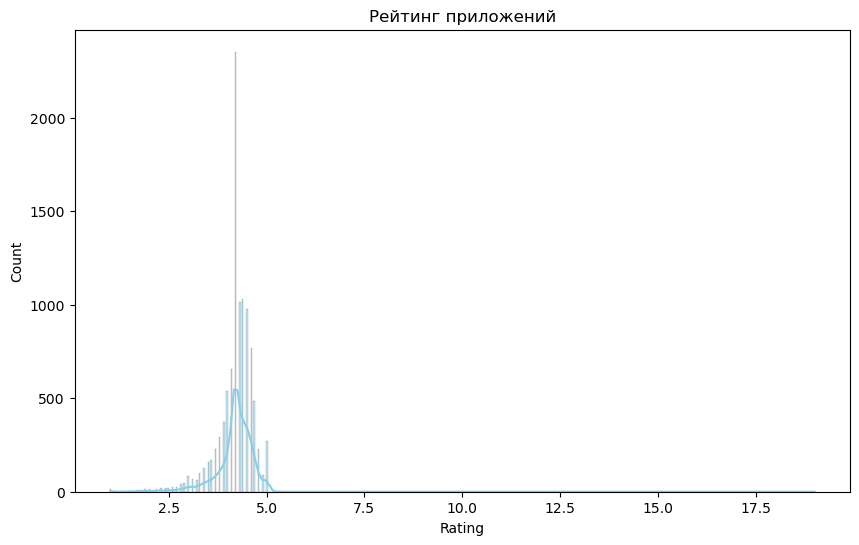

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, color='skyblue')
plt.title('Рейтинг приложений')
plt.show()

In [6]:
# обнаружение и обработка выбросов
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number))) # z оценки для числовых переменных
df = df[(z_scores <3).all(axis=1)] # удаление строк с выбросами

/home/nic/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


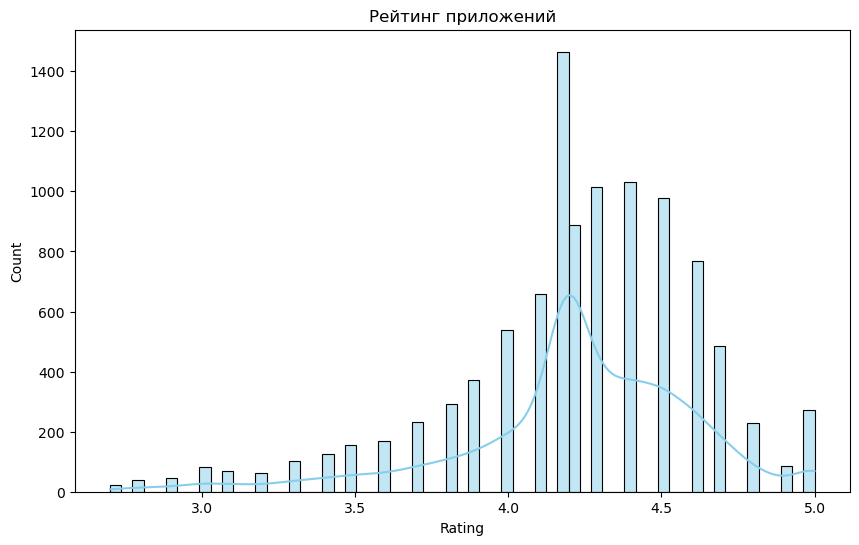

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, color='skyblue')
plt.title('Рейтинг приложений')
plt.show()

In [8]:
# стандартизицая данных (числовых переменных)
df_standardized = df.copy() # копия датафрейм
df_standardized[numeric_cols.columns] = (df_standardized[numeric_cols.columns] - df_standardized[numeric_cols.columns].mean()) / df_standardized[numeric_cols.columns].std()

In [9]:
# преобразование категорийной переменной в числовую
label_encoder = LabelEncoder()
df['Type_Encoded'] = label_encoder.fit_transform(df['Type'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.2004,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [10]:
# one hot encoding
df = pd.get_dummies(df, columns=['Content Rating'], prefix='ContentRating', drop_first=True)

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen,ContentRating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,True,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,True,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Art & Design,"August 1, 2018",1.2.2004,4.0.3 and up,0,True,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,False,False,False,True,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,True,False,False,False,False


In [12]:
# создание сводной таблицы
pivot_table = df.pivot_table(index="Category", columns='ContentRating_Teen', values='Rating', aggfunc='mean')
print(pivot_table)

ContentRating_Teen      False     True 
Category                               
ART_AND_DESIGN       4.344839  4.466667
AUTO_AND_VEHICLES    4.235610  4.200000
BEAUTY               4.272668  4.064446
BOOKS_AND_REFERENCE  4.313175  4.299683
BUSINESS             4.178059  4.226157
COMICS               4.228597  4.031818
COMMUNICATION        4.173294  4.282152
DATING               4.072742  4.116003
EDUCATION            4.371266  4.800000
ENTERTAINMENT        4.162222  4.118182
EVENTS               4.344287  4.499167
FAMILY               4.226659  4.168359
FINANCE              4.216094  4.098668
FOOD_AND_DRINK       4.195498  4.386667
GAME                 4.292214  4.278251
HEALTH_AND_FITNESS   4.356349  4.304211
HOUSE_AND_HOME       4.156667  4.650000
LIBRARIES_AND_DEMO   4.181962       NaN
LIFESTYLE            4.171623  4.380304
MAPS_AND_NAVIGATION  4.076219  4.400000
MEDICAL              4.258630  4.397335
NEWS_AND_MAGAZINES   4.185720  4.221250
PARENTING            4.314369  4.700000


/home/nic/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


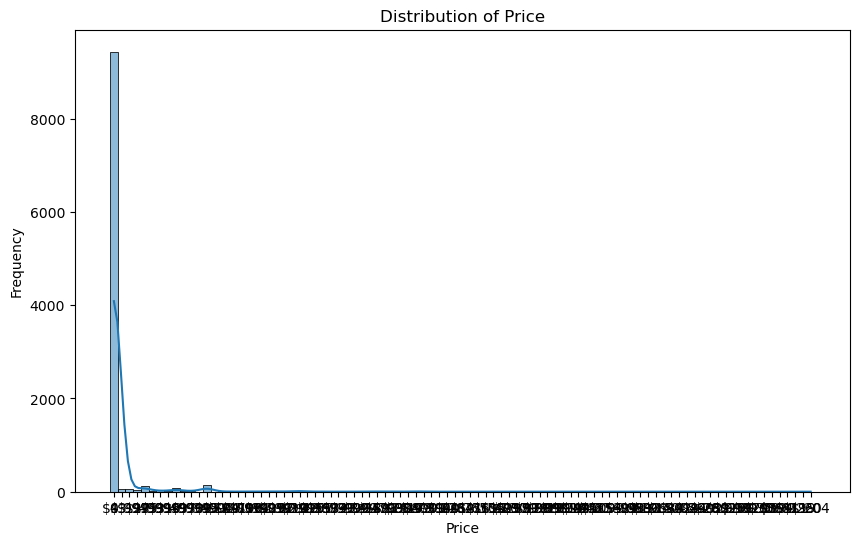

In [13]:
# Гистограмма распределения цены продажи
plt.figure(figsize=(10, 6)) # Задание размера графика
sns.histplot(df['Price'], kde=True) # Создание гистограммы с ядерной оценкой плотности
plt.xlabel('Price') # Подпись оси X
plt.ylabel('Frequency') # Подпись оси Y
plt.title('Distribution of Price') # Название графика
plt.show()

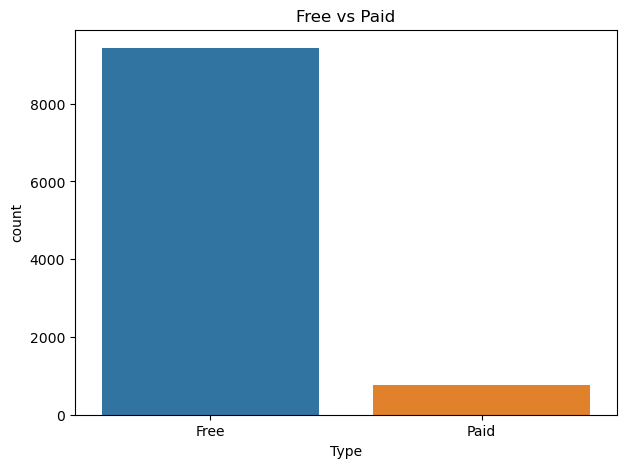

In [14]:
# распределение платных и бесплатных приложений

plt.figure(figsize=(7, 5))
sns.countplot(x="Type", data=df)
plt.title("Free vs Paid")
plt.show()